In [1]:
# Common imports
import numpy as np
import pandas as pd
import os

# Timing models
import math, time, datetime

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

# Warnings
import warnings
# to change warnings in functions:
#warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
# to reset warnings:
#warnings.resetwarnings()

# Where to save the figures
PROJECT_ROOT_DIR = '/Users/Gregs_Computer/Documents/Studies/Data Science/Projects/Online Shopping Intention (UCI)/'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'Images')
os.makedirs(IMAGES_PATH, exist_ok=True)

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, 'images', fig_id)

def save_fig(fig_id, tight_layout=True):
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + '.png', format='png', dpi=300)


# Dataset Info

#### Citation:
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).

Abstract: Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.


#### Source:

Source 
1. C. Okan Sakar 
Department of Computer Engineering, Faculty of 
Engineering and Natural Sciences, Bahcesehir University, 
34349 Besiktas, Istanbul, Turkey 

2. Yomi Kastro 
Inveon Information Technologies Consultancy and Trade, 
34335 Istanbul, Turkey


#### Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session 
would belong to a different user in a 1-year period to avoid 
any tendency to a specific campaign, special day, user 
profile, or period.


#### Attribute Information:

The dataset consists of **10 numerical** and **8 categorical** attributes.

The **'Revenue'** attribute can be used as the class label. 

**"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"** represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The **"Bounce Rate", "Exit Rate" and "Page Value"** features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.

-  The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

-  The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

-  The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The **"Special Day"** feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes **operating system, browser, region, traffic type, visitor type** as returning or new visitor, a Boolean value indicating whether the date of the visit is **weekend**, and **month** of the year.

The label for this dataset is single-variate CATEGORICAL ('Revenue' is boolean True/False)

# General Preliminary Observations

In [2]:
# Load the data
shopping_original = pd.read_csv(os.path.join(PROJECT_ROOT_DIR, 'Data', 'online_shoppers_intention.csv'))

In [3]:
shopping_original.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
shopping_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

### Missing Values

In [5]:
# Function to show us how many missing values there are
def find_missing_values(df, columns):
    '''
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe (ie train)
    ::param_columns:: = list of columns (train.columns)
    '''
    missing_vals = {}
    print('Number of missing or NaN values for each column:')
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length - total_column_values
        # missing_vals.append(str(column + ' column has {} missing or NaN values.'.format())
    return missing_vals
missing_values = find_missing_values(shopping_original, columns=shopping_original.columns)
missing_values

Number of missing or NaN values for each column:


{'Administrative': 0,
 'Administrative_Duration': 0,
 'Informational': 0,
 'Informational_Duration': 0,
 'ProductRelated': 0,
 'ProductRelated_Duration': 0,
 'BounceRates': 0,
 'ExitRates': 0,
 'PageValues': 0,
 'SpecialDay': 0,
 'Month': 0,
 'OperatingSystems': 0,
 'Browser': 0,
 'Region': 0,
 'TrafficType': 0,
 'VisitorType': 0,
 'Weekend': 0,
 'Revenue': 0}

We can see there are no missing values.

## Explore Categorical Features

In [6]:
# Create list of categorical variables
cat_attribs = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
shopping_cat_temp = shopping_original[cat_attribs]

### View summary stats of numerical variables

In [7]:
num_names = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
shopping_num_temp = pd.DataFrame({})
for name in num_names:
    shopping_num_temp[name] = shopping_original[name]
shopping_num_temp.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


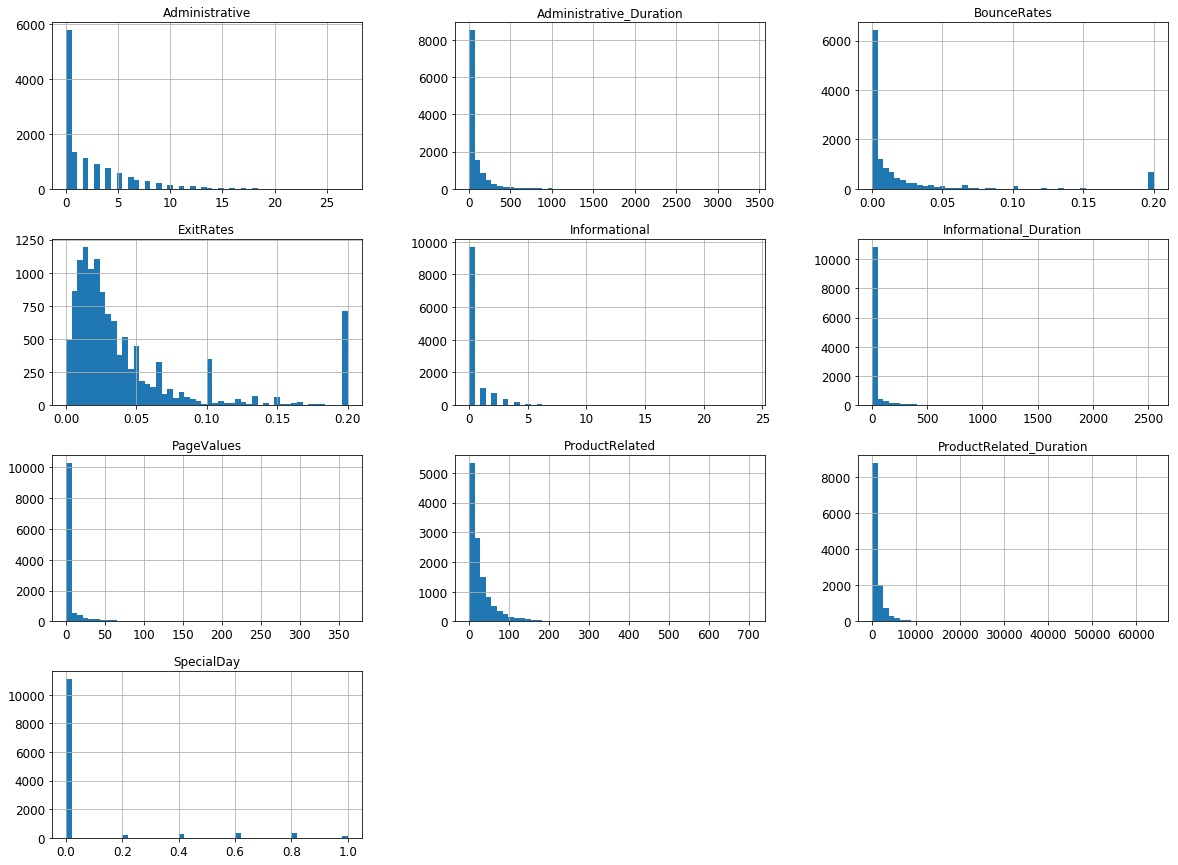

In [8]:
# Plot histograms of each numerical variable
shopping_num_temp.hist(bins=50, figsize=(20,15))
plt.show()

# Create Train and Test Set

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(shopping_original, test_size=0.2, random_state=42)

In [10]:
train_set.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1785,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,Mar,2,6,1,1,Returning_Visitor,False,False
10407,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,Nov,2,2,3,2,Returning_Visitor,False,False
286,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
6520,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,Sep,2,2,8,2,New_Visitor,False,False
12251,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,Nov,3,2,7,8,New_Visitor,True,False


# Exploring the Data

In [11]:
# Create a copy of training set to play with it without harming the training set
shopping = train_set.copy()

### Visualize the Data

### Looking for Correlations

In [12]:
# Correlation Matrix
corr_matrix = shopping.corr()

Compare correlations to label value:

In [13]:
# Compare correlations to label value
corr_matrix['Revenue']

Administrative             0.126812
Administrative_Duration    0.088759
Informational              0.096208
Informational_Duration     0.065073
ProductRelated             0.145314
ProductRelated_Duration    0.139833
BounceRates               -0.147753
ExitRates                 -0.205205
PageValues                 0.495700
SpecialDay                -0.090200
OperatingSystems          -0.021798
Browser                    0.022380
Region                    -0.010927
TrafficType               -0.000605
Weekend                    0.026159
Revenue                    1.000000
Name: Revenue, dtype: float64

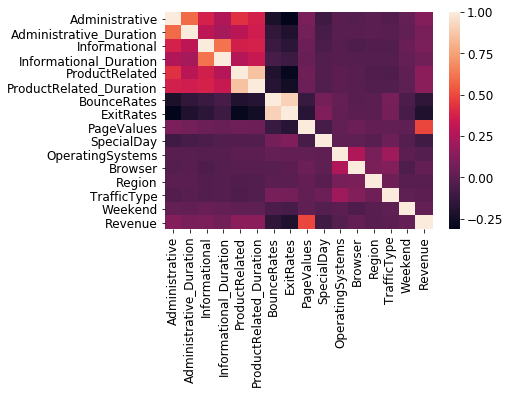

In [14]:
# Heatmap
sns.heatmap(corr_matrix)

# Attribute Combinations

# Prepare the Data for Machine Learning Algorithms

## Data Cleaning

In [16]:
shopping = train_set.drop('Revenue', axis=1)
shopping_labels = train_set['Revenue'].copy()

### Missing Values

N/A

### Converting Categorical Attributes to Numerical

In [17]:
cat_attribs = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
shopping_cat = shopping[cat_attribs]
shopping_cat.head(10)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
1785,Mar,2,6,1,1,Returning_Visitor,False
10407,Nov,2,2,3,2,Returning_Visitor,False
286,Mar,2,2,1,1,Returning_Visitor,False
6520,Sep,2,2,8,2,New_Visitor,False
12251,Nov,3,2,7,8,New_Visitor,True
1758,Mar,3,2,9,3,Returning_Visitor,False
5524,Oct,1,1,4,2,New_Visitor,False
1284,Mar,2,2,4,3,New_Visitor,False
5350,May,1,1,1,15,Returning_Visitor,False
5284,May,2,2,4,2,Returning_Visitor,False


### Feature Scaling

### Transformation Pipelines

In [18]:
# Isolating numerical attributes
shopping_num = shopping.drop(cat_attribs, axis=1)

# Creating numerical pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

shopping_num_tr = num_pipeline.fit_transform(shopping_num)

/Users/Gregs_Computer/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Gregs_Computer/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
shopping_num_tr

array([[-0.69846932, -0.45693682, -0.39741233, ...,  0.40328167,
        -0.31559324, -0.30836428],
       [-0.09184802, -0.3780645 , -0.39741233, ..., -0.59955507,
        -0.16574433, -0.30836428],
       [-0.69846932, -0.45693682, -0.39741233, ...,  3.29012419,
        -0.31559324, -0.30836428],
       ...,
       [-0.69846932, -0.45693682, -0.39741233, ...,  0.50282796,
        -0.31559324, -0.30836428],
       [-0.69846932, -0.45693682, -0.39741233, ..., -0.54240812,
        -0.31559324, -0.30836428],
       [ 1.42470521,  0.32136402, -0.39741233, ..., -0.29047942,
        -0.31559324, -0.30836428]])

To weave the categorical values into this pipeline, we use sklearn's ColumnTransformer:

In [20]:
num_attribs = list(shopping_num) # returns list of attributes

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

shopping_prepared = full_pipeline.fit_transform(shopping)

/Users/Gregs_Computer/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Gregs_Computer/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [21]:
# new training set shape
shopping_prepared.shape

(9864, 75)

In [22]:
# compare to original training set shape
shopping.shape

(9864, 17)

# Select and Train a Model

### Functions

In [23]:
# Model Evaluation Metrics
def model_evaluation_metrics(fitted_model, X_train, y_train,
                             cv=5, non_cv_metrics=True):
    '''
    function to output:
    1) CV confusion matrix
    2) CV Evaluation Metrics (accuracy, recall, precision, f1).
    3) non-CV Evaluation Metrics
    '''
    from sklearn.model_selection import cross_val_predict
    y_pred = cross_val_predict(fitted_model, X_train, y_train, cv=cv)
    
    # CV Confusion Matrix
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_train, y_pred)
    print('Confusion Matrix:')
    print(confusion_matrix)
    print()
    
    # CV Evaluation Metrics
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
    print('CV Scores:')
    print('CV Accuracy Score:', accuracy_score(y_train, y_pred))
    print('CV Precision Score:', precision_score(y_train, y_pred))
    print('CV Recall Score:', recall_score(y_train, y_pred))
    print('CV F1 Score:', f1_score(y_train, y_pred))
    print()
    
    # non-CV Evaluation Metrics
    if non_cv_metrics == True:
        y_pred_non_cv = fitted_model.predict(X_train)
        print('Non-CV Scores:')
        print('Non-CV Accuracy Score:', accuracy_score(y_train, y_pred_non_cv))
        print('Non-CV Precision Score:', precision_score(y_train, y_pred_non_cv))
        print('Non-CV Recall Score:', recall_score(y_train, y_pred_non_cv))
        print('Non-CV F1 Score:', f1_score(y_train, y_pred_non_cv))

In [24]:
# Plot precision-recall curves
def plot_precision_recall_curves(fitted_model, X_train, y_train, cv=5, method='decision_function',
                                 xlim=[-10,10],
                                 predict_proba=False):
    '''
    A function to output:
        1) Precision-Recall-Threshold Graph
        2) Precision-Recall Graph
    '''
    if method == 'decision_function':
        from sklearn.model_selection import cross_val_predict
        df_pred_scores = cross_val_predict(fitted_model,
                                            X_train,
                                            y_train,
                                            cv=cv,
                                            method=method)

        from sklearn.metrics import precision_recall_curve
        precisions, recalls, thresholds = precision_recall_curve(
                                            y_train,
                                            df_pred_scores)

    if method == 'predict_proba':
        from sklearn.model_selection import cross_val_predict
        df_pred_scores = cross_val_predict(fitted_model,
                                            X_train,
                                            y_train,
                                            cv=cv,
                                            method=method)

        from sklearn.metrics import precision_recall_curve
        precisions, recalls, thresholds = precision_recall_curve(
                                            y_train,
                                            df_pred_scores[:, 1])

    # Precision-Recall-Threshold Graph
    def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
        plt.plot(thresholds, precisions[:-1], 'b--',
                 label='Precision', linewidth=2)
        plt.plot(thresholds, recalls[:-1], 'g-',
                 label='Recall', linewidth=2)
        plt.xlabel('Threshold', fontsize=16)
        plt.legend(loc='upper left', fontsize=16)
        plt.ylim([0, 1])

    plt.figure(figsize=(8, 4))
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plt.xlim(xlim)
    plt.show()        
    
    # Precision-Recall Graph
    def plot_precision_vs_recall(precisions, recalls):
        plt.plot(recalls, precisions, 'b-', linewidth=2)
        plt.xlabel('Recall', fontsize=16)
        plt.ylabel('Precision', fontsize=16)
        plt.axis([0, 1, 0, 1])
    
    plt.figure(figsize=(8, 6))
    plot_precision_vs_recall(precisions, recalls)
    plt.show()

    '''
    def adjusted_classes(y_scores, t):
        """
        A function for adjusting class predictions based on the prediction threshold (t).
        Will only work for binary classification problems.
        
        return [1 if y >= t else 0 for y in y_scores]'''

In [25]:
# Run GridSearchCV
def model_grid_search(model, X_train, y_train, param_grid, cv=5,
                      scoring='f1'):
    '''
    A function to perform GridSearchCV and output:
        1) best params
        2) best estimator
        3) test scores
    '''

    # To ignore warnings
    import warnings
    warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"
    
    # Perform GridSearchCV
    start_time = time.time()
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=cv,
                               scoring=scoring,
                               return_train_score=True)
    grid_search.fit(X_train, y_train)

    running_time = (time.time() - start_time)
    print('Running Time: {}'.format(datetime.timedelta(seconds=running_time)))

    # best params
    print('\nBest Parameters:\n', grid_search.best_params_)

    # best estimator
    print('\nBest Estimator:\n', grid_search.best_estimator_)

    # test scores
    print('\n' + str(scoring) + ' Test Scores:\n')
    print('Best Test Score:', grid_search.cv_results_['mean_test_score'].max())
    print()
    cvres = grid_search.cv_results_
    for test_score, params in zip(cvres['mean_test_score'], cvres['params']):
        print(test_score, params)

    # cv results
    #cv_results = pd.DataFrame(grid_search.cv_results_)
    #print('\n CV Results:\n')
    #return cv_results
    
    # To stop ignoring warnings
    warnings.resetwarnings()
    
    return grid_search

### Determine Scoring Metrics

In [26]:
shopping_labels.value_counts()

False    8367
True     1497
Name: Revenue, dtype: int64

Use PR when:
    
-  The Positive class is rare.

-  Care more about FP than FN.

Otherwise use ROC AUC.

The positive class is rare, so we should use PR and F1.

## Models

## SGD Classifier

SGDClassifier handles very large datasets efficiently because it handles each training instance independently, one at a time.

In [27]:
start_time = time.time()

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000,
                        tol=1e-3,
                        random_state=42)
sgd_clf.fit(shopping_prepared, shopping_labels)

sgd_clf_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=sgd_clf_time)))

Running Time: 0:00:00.284105


#### SGD Classifier Evaluation Metrics

In [28]:
model_evaluation_metrics(sgd_clf,
                         shopping_prepared,
                         shopping_labels)

Confusion Matrix:
[[8108  259]
 [ 805  692]]

CV Scores:
CV Accuracy Score: 0.8921330089213301
CV Precision Score: 0.7276550998948476
CV Recall Score: 0.4622578490313961
CV F1 Score: 0.565359477124183

Non-CV Scores:
Non-CV Accuracy Score: 0.8824006488240065
Non-CV Precision Score: 0.6731757451181911
Non-CV Recall Score: 0.43754175016700064
Non-CV F1 Score: 0.5303643724696356


F1 score isn't very useful since P/R aren't very close.

Plot our PR Curve to decide which threshold to use for PR.

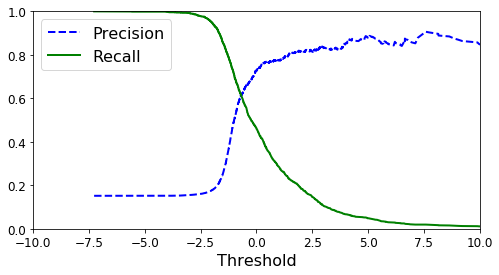

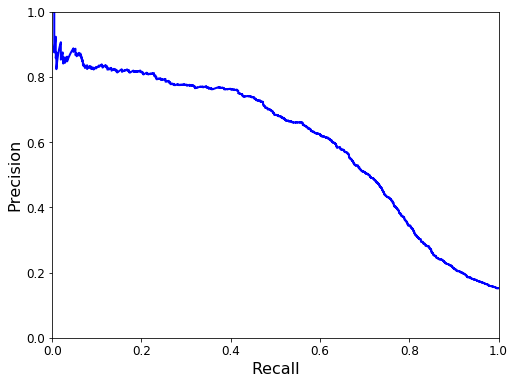

In [29]:
# Plot PR Curves
plot_precision_recall_curves(sgd_clf,
                             shopping_prepared, shopping_labels)

#### SGD Classifier Grid Search

In [30]:
# Generic model
sgd_clf_model_grid_search = SGDClassifier(max_iter=1000,
                        tol=1e-3,
                        n_jobs=-1,
                        random_state=42)

# Parameter Grid
sgd_clf_param_grid = [
    {'alpha': [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
     'penalty': ['l1', 'l2']}
]

# Run Grid Search
sgd_clf_grid_search = model_grid_search(sgd_clf_model_grid_search,
                      shopping_prepared, shopping_labels,
                      sgd_clf_param_grid, cv=5,
                      scoring='f1')

Running Time: 0:00:03.761033

Best Parameters:
 {'alpha': 0.0001, 'penalty': 'l2'}

Best Estimator:
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

f1 Test Scores:

Best Test Score: 0.5624657150729286

0.48614182726040467 {'alpha': 1e-06, 'penalty': 'l1'}
0.4662467952699627 {'alpha': 1e-06, 'penalty': 'l2'}
0.5111369632810951 {'alpha': 1e-05, 'penalty': 'l1'}
0.5214859686206688 {'alpha': 1e-05, 'penalty': 'l2'}
0.5159451960144786 {'alpha': 0.0001, 'penalty': 'l1'}
0.5624657150729286 {'alpha': 0.0001, 'penalty': 'l2'}
0.5273450197782781 {'alpha': 0.001, 'penalty': 'l1'}
0.5383696552495721 {'alpha': 0.001, 'penalty': 'l2'}
0.5214514395076533 

In [31]:
model_evaluation_metrics(sgd_clf_grid_search.best_estimator_,
                         shopping_prepared, shopping_labels)

Confusion Matrix:
[[8108  259]
 [ 805  692]]

CV Scores:
CV Accuracy Score: 0.8921330089213301
CV Precision Score: 0.7276550998948476
CV Recall Score: 0.4622578490313961
CV F1 Score: 0.565359477124183

Non-CV Scores:
Non-CV Accuracy Score: 0.8824006488240065
Non-CV Precision Score: 0.6731757451181911
Non-CV Recall Score: 0.43754175016700064
Non-CV F1 Score: 0.5303643724696356


In [32]:
sgd_clf_final = sgd_clf_grid_search.best_estimator_

## Logistic Regression

In [33]:
start_time = time.time()

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(shopping_prepared, shopping_labels)

log_reg_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=log_reg_time)))

Running Time: 0:00:00.088996


In [34]:
model_evaluation_metrics(log_reg,
                         shopping_prepared, shopping_labels)

Confusion Matrix:
[[8171  196]
 [ 922  575]]

CV Scores:
CV Accuracy Score: 0.8866585563665855
CV Precision Score: 0.7457846952010376
CV Recall Score: 0.38410153640614564
CV F1 Score: 0.5070546737213404

Non-CV Scores:
Non-CV Accuracy Score: 0.8884833738848338
Non-CV Precision Score: 0.7541613316261203
Non-CV Recall Score: 0.39345357381429524
Non-CV F1 Score: 0.5171202809482002


#### Logistic Regression PR Curve

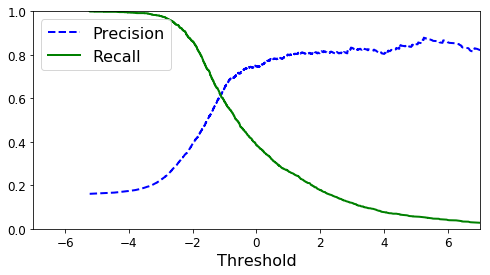

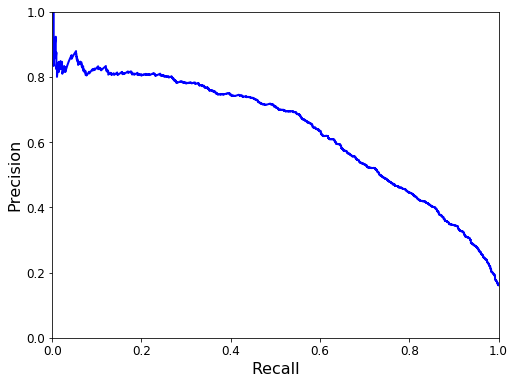

In [35]:
plot_precision_recall_curves(log_reg,
                             shopping_prepared, shopping_labels,
                             xlim=[-7,7])

#### Logistic Regression Grid Search

In [36]:
# Generic model
log_reg_model_grid_search = LogisticRegression(solver='liblinear',
                                               random_state=42)

# Parameter grid
log_reg_param_grid = [
    {'C': [1e-7, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
     'penalty': ['l1', 'l2']}
]

# Grid Search
log_reg_grid_search = model_grid_search(log_reg_model_grid_search,
                                        shopping_prepared, shopping_labels,
                                        log_reg_param_grid)

Running Time: 0:00:13.303692

Best Parameters:
 {'C': 1.0, 'penalty': 'l1'}

Best Estimator:
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

f1 Test Scores:

Best Test Score: 0.5084048426231305

0.0 {'C': 1e-07, 'penalty': 'l1'}
0.04769832291143952 {'C': 1e-07, 'penalty': 'l2'}
0.0 {'C': 0.0001, 'penalty': 'l1'}
0.0998029521363801 {'C': 0.0001, 'penalty': 'l2'}
0.11770715121470376 {'C': 0.001, 'penalty': 'l1'}
0.31684507558247627 {'C': 0.001, 'penalty': 'l2'}
0.47632174832153307 {'C': 0.01, 'penalty': 'l1'}
0.47055885160281435 {'C': 0.01, 'penalty': 'l2'}
0.5041952423172673 {'C': 0.1, 'penalty': 'l1'}
0.5045681133588699 {'C': 0.1, 'penalty': 'l2'}
0.5084048426231305 {'C': 1.0, 'penalty': 'l1'}
0.5064283520349033 {'C': 1.0, 'penalty': 'l2'}
0.5072365672554188 {'C': 10.0

In [37]:
# Grid search evaluation metrics
model_evaluation_metrics(log_reg_grid_search.best_estimator_,
                         shopping_prepared, shopping_labels)

Confusion Matrix:
[[8174  193]
 [ 920  577]]

CV Scores:
CV Accuracy Score: 0.8871654501216545
CV Precision Score: 0.7493506493506493
CV Recall Score: 0.385437541750167
CV F1 Score: 0.5090427878253198

Non-CV Scores:
Non-CV Accuracy Score: 0.88838199513382
Non-CV Precision Score: 0.7525510204081632
Non-CV Recall Score: 0.39412157648630597
Non-CV F1 Score: 0.5173169662428759


In [38]:
log_reg_final = log_reg_grid_search.best_estimator_

### Support Vector Machines

### Linear SVC

In [39]:
start_time = time.time()

from sklearn.svm import LinearSVC
linear_svc = LinearSVC(loss='hinge', max_iter=1000000,
                       random_state=42)
linear_svc.fit(shopping_prepared, shopping_labels)

linear_svc_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=linear_svc_time)))

Running Time: 0:00:01.529800


In [40]:
model_evaluation_metrics(linear_svc,
                         shopping_prepared, shopping_labels)

Confusion Matrix:
[[8164  203]
 [ 885  612]]

CV Scores:
CV Accuracy Score: 0.8896999188969992
CV Precision Score: 0.750920245398773
CV Recall Score: 0.4088176352705411
CV F1 Score: 0.5294117647058824

Non-CV Scores:
Non-CV Accuracy Score: 0.8904095701540957
Non-CV Precision Score: 0.7561576354679803
Non-CV Recall Score: 0.41015364061456244
Non-CV F1 Score: 0.5318319618882633


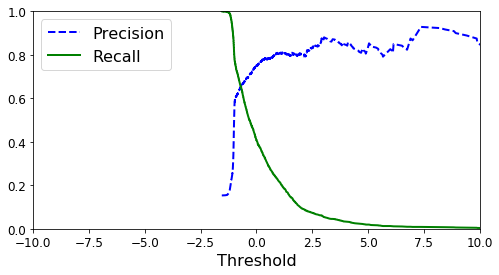

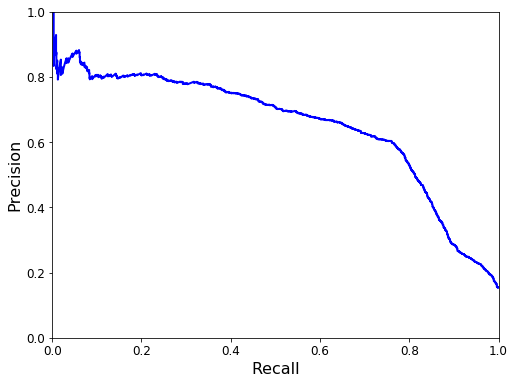

In [41]:
plot_precision_recall_curves(linear_svc,
                             shopping_prepared, shopping_labels)

### Poly/RBF Kernel SVC

We'll start with a poly kernel before grid search just to see how it performs.

In [42]:
start_time = time.time()

from sklearn.svm import SVC
poly_kernel_svm_clf = SVC(kernel='poly', degree=3, coef0=1, C=5,
                          gamma='auto')
poly_kernel_svm_clf.fit(shopping_prepared, shopping_labels)

poly_svm_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=poly_svm_time)))

Running Time: 0:00:03.285610


In [43]:
model_evaluation_metrics(poly_kernel_svm_clf,
                         shopping_prepared, shopping_labels)

Confusion Matrix:
[[8114  253]
 [ 756  741]]

CV Scores:
CV Accuracy Score: 0.8977088402270884
CV Precision Score: 0.7454728370221329
CV Recall Score: 0.49498997995991983
CV F1 Score: 0.5949417904456042

Non-CV Scores:
Non-CV Accuracy Score: 0.9077453365774534
Non-CV Precision Score: 0.791459781529295
Non-CV Recall Score: 0.5323981295925184
Non-CV F1 Score: 0.6365814696485623


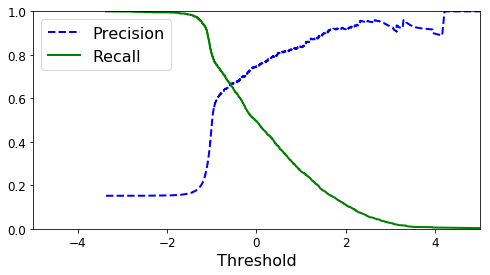

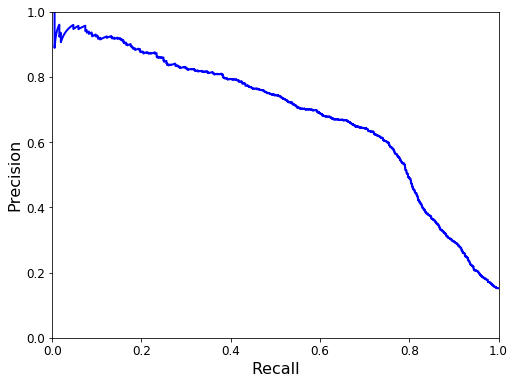

In [44]:
plot_precision_recall_curves(poly_kernel_svm_clf,
                             shopping_prepared, shopping_labels,
                             xlim=[-5,5])

### Decision Trees

In [45]:
start_time = time.time()

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=1,
                                  random_state=42)
tree_clf.fit(shopping_prepared, shopping_labels)
print(tree_clf)

tree_clf_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=tree_clf_time)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
Running Time: 0:00:00.024387


/Users/Gregs_Computer/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [46]:
model_evaluation_metrics(tree_clf,
                         shopping_prepared, shopping_labels)

Confusion Matrix:
[[7496  871]
 [ 338 1159]]

CV Scores:
CV Accuracy Score: 0.8774330900243309
CV Precision Score: 0.570935960591133
CV Recall Score: 0.7742150968603875
CV F1 Score: 0.6572157641054721

Non-CV Scores:
Non-CV Accuracy Score: 0.8767234387672344
Non-CV Precision Score: 0.5666192508297772
Non-CV Recall Score: 0.7982631930527722
Non-CV F1 Score: 0.6627842484747642


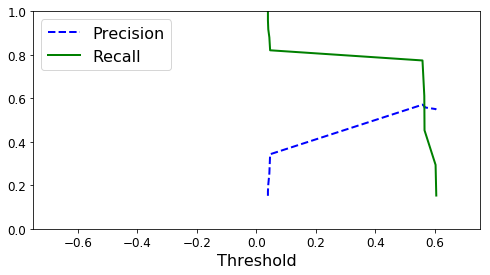

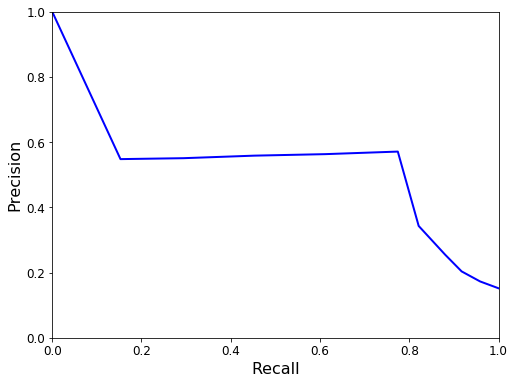

In [47]:
plot_precision_recall_curves(tree_clf,
                             shopping_prepared, shopping_labels,
                             method='predict_proba',
                             xlim=[-.75,.75])

In [48]:
tree_clf_model_grid_search = DecisionTreeClassifier(random_state=42).fit(shopping_prepared, shopping_labels)

tree_param_grid = [
    {'max_depth': [1, 2, 3, 5, 20, 100],
     'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
     'max_leaf_nodes': [None, 2, 3, 5]
    }
]

tree_grid_search = model_grid_search(tree_clf_model_grid_search,
                  shopping_prepared, shopping_labels,
                  tree_param_grid)

Running Time: 0:00:14.536944

Best Parameters:
 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.2}

Best Estimator:
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.2, presort=False, random_state=42,
            splitter='best')

f1 Test Scores:

Best Test Score: 0.6578587102234936

0.6569884711869434 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0}
0.6569884711869434 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.1}
0.6578587102234936 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.2}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.3}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.4}
0.0 {'max_depth': 1, 'max

In [49]:
# Grid search evaluation metrics
model_evaluation_metrics(tree_grid_search.best_estimator_, shopping_prepared, shopping_labels)

Confusion Matrix:
[[7469  898]
 [ 323 1174]]

CV Scores:
CV Accuracy Score: 0.8762165450121655
CV Precision Score: 0.5666023166023166
CV Recall Score: 0.7842351369405478
CV F1 Score: 0.657887363407117

Non-CV Scores:
Non-CV Accuracy Score: 0.8767234387672344
Non-CV Precision Score: 0.5666192508297772
Non-CV Recall Score: 0.7982631930527722
Non-CV F1 Score: 0.6627842484747642


In [50]:
tree_clf_final = tree_grid_search.best_estimator_

### Bagging Decision Tree Classifier

In [51]:
start_time = time.time()

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                            n_estimators=500,
                            max_samples=100,
                            bootstrap=True,
                            n_jobs=-1,
                            oob_score=True)
bag_clf.fit(shopping_prepared, shopping_labels)

bag_clf_time = (time.time() - start_time)
print('Running Time: {}\n'.format(datetime.timedelta(seconds=bag_clf_time)))
print(bag_clf)
print('\noob Score: ', bag_clf.oob_score_)

/Users/Gregs_Computer/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Running Time: 0:00:06.653987

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

oob Score:  0.8981143552311436


In [52]:
model_evaluation_metrics(bag_clf,
                         shopping_prepared, shopping_labels)

Confusion Matrix:
[[7978  389]
 [ 601  896]]

CV Scores:
CV Accuracy Score: 0.8996350364963503
CV Precision Score: 0.6972762645914397
CV Recall Score: 0.5985303941215765
CV F1 Score: 0.6441409058231489

Non-CV Scores:
Non-CV Accuracy Score: 0.9005474452554745
Non-CV Precision Score: 0.705087440381558
Non-CV Recall Score: 0.5925183700734803
Non-CV F1 Score: 0.6439201451905626


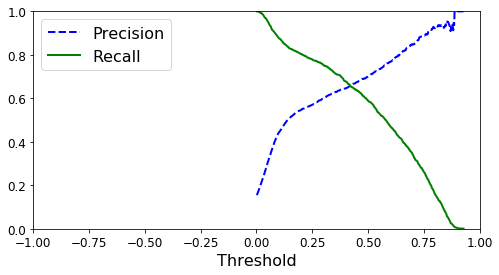

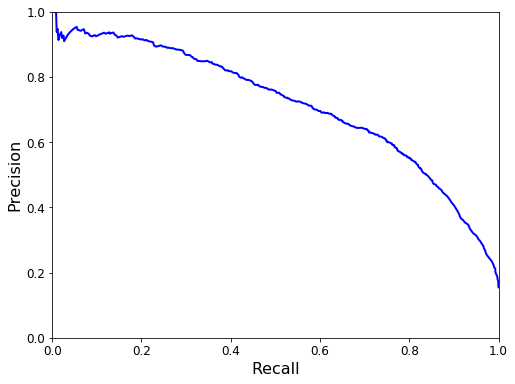

In [53]:
plot_precision_recall_curves(bag_clf,
                             shopping_prepared, shopping_labels,
                             method='predict_proba',
                             xlim=[-1,1])

### Random Forests

In [54]:
start_time = time.time()

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100,
                                 random_state=42)
rnd_clf.fit(shopping_prepared, shopping_labels)

rnd_clf_time = (time.time() - start_time)
print('Running Time: {}\n'.format(datetime.timedelta(seconds=rnd_clf_time)))

print(rnd_clf)

Running Time: 0:00:04.153934

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [55]:
model_evaluation_metrics(rnd_clf,
                         shopping_prepared, shopping_labels)

Confusion Matrix:
[[8152  215]
 [ 748  749]]

CV Scores:
CV Accuracy Score: 0.9023722627737226
CV Precision Score: 0.7769709543568465
CV Recall Score: 0.5003340013360054
CV F1 Score: 0.608695652173913

Non-CV Scores:
Non-CV Accuracy Score: 1.0
Non-CV Precision Score: 1.0
Non-CV Recall Score: 1.0
Non-CV F1 Score: 1.0


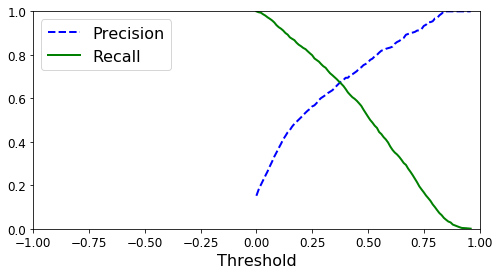

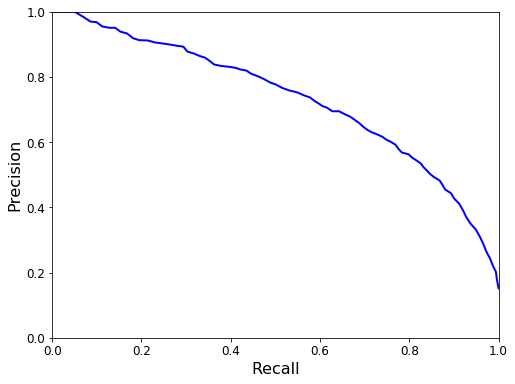

In [56]:
plot_precision_recall_curves(rnd_clf,
                             shopping_prepared, shopping_labels,
                             method='predict_proba',
                             xlim=[-1,1])

#### Random Forest Grid Search

In [57]:
start_time = time.time()

forest_clf_grid = RandomForestClassifier(n_estimators=100,
                                         n_jobs=-1,
                                         random_state=42)

forest_param_grid = [
    {
     'n_estimators': [3, 30, 100, 500],
     'max_depth': [1, 2, 3, 5, 100],
     'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.5],
     'max_leaf_nodes': [None, 2, 5, 20],
    }
]

forest_grid_search = model_grid_search(forest_clf_grid,
                  shopping_prepared, shopping_labels,
                  forest_param_grid)

forest_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=forest_time)))

Running Time: 0:17:42.302380

Best Parameters:
 {'max_depth': 100, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500}

Best Estimator:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

f1 Test Scores:

Best Test Score: 0.6212917592257509

0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 3}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n

In [58]:
model_evaluation_metrics(forest_grid_search.best_estimator_,
                         shopping_prepared,
                         shopping_labels)

Confusion Matrix:
[[8152  215]
 [ 725  772]]

CV Scores:
CV Accuracy Score: 0.9047039740470397
CV Precision Score: 0.7821681864235056
CV Recall Score: 0.5156980627922512
CV F1 Score: 0.6215780998389694

Non-CV Scores:
Non-CV Accuracy Score: 1.0
Non-CV Precision Score: 1.0
Non-CV Recall Score: 1.0
Non-CV F1 Score: 1.0


In [59]:
final_forest_clf = forest_grid_search.best_estimator_

#### Extra-Trees Classifier Grid Search

In [60]:
start_time = time.time()

from sklearn.ensemble import ExtraTreesClassifier

extra_trees_clf_grid = ExtraTreesClassifier(n_jobs=-1, random_state=42).fit(shopping_prepared, shopping_labels)

extra_trees_param_grid = [
    {
     'n_estimators': [3, 30, 100, 500],
     'max_depth': [1, 2, 3, 5, 100],
     'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.5],
     'max_leaf_nodes': [None, 2, 5, 20],
    }
]

extra_trees_grid_search = model_grid_search(extra_trees_clf_grid,
                  shopping_prepared, shopping_labels,
                  extra_trees_param_grid)

extra_trees_time = (time.time() - start_time)
print('Running Time: {}'.format(datetime.timedelta(seconds=extra_trees_time)))

/Users/Gregs_Computer/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Running Time: 0:16:59.884356

Best Parameters:
 {'max_depth': 100, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100}

Best Estimator:
 ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=100, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

f1 Test Scores:

Best Test Score: 0.4733062478296162

0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 3}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100}
0.0 {'max_depth': 1, 'max_leaf_nodes': None, 'min_weight_fraction_leaf': 0.0, 'n_estim

### CatBoost

In [61]:
# View the data for the CatBoost model
catboost_shopping_prepared = shopping.copy()
catboost_shopping_prepared.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
1785,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,Mar,2,6,1,1,Returning_Visitor,False
10407,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,Nov,2,2,3,2,Returning_Visitor,False
286,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Mar,2,2,1,1,Returning_Visitor,False
6520,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,Sep,2,2,8,2,New_Visitor,False
12251,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,Nov,3,2,7,8,New_Visitor,True


In [62]:
# Generate list of categorical feature names
catboost_categoricals = list(shopping_cat.columns)
catboost_categoricals

['Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [63]:
# View the labels for the CatBoost model
shopping_labels.head()

1785     False
10407    False
286      False
6520     False
12251    False
Name: Revenue, dtype: bool

In [64]:
# Binarize the labels
catboost_shopping_labels = shopping_labels.astype(int)
catboost_shopping_labels.head(10)

1785     0
10407    0
286      0
6520     0
12251    0
1758     0
5524     1
1284     0
5350     0
5284     0
Name: Revenue, dtype: int64

In [65]:
# Use the CatBoost Pool() function to pool together the training
# data and categorical feature labels.
import catboost
from catboost import CatBoostClassifier, Pool, cv

train_pool = Pool(catboost_shopping_prepared,
                  catboost_shopping_labels,
                  catboost_categoricals)

/Users/Gregs_Computer/anaconda3/lib/python3.7/imp.py:342: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return _load(spec)


In [66]:
# CatBoost model definition

catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy',
                                                 'Precision',
                                                 'Recall',
                                                 'F1',
                                                 'AUC'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = catboost_model.score(catboost_shopping_prepared,
                                    catboost_shopping_labels)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.032021


0:	learn: 0.6532759	total: 351ms	remaining: 5m 50s
1:	learn: 0.6147741	total: 542ms	remaining: 4m 30s
2:	learn: 0.5834749	total: 775ms	remaining: 4m 17s
3:	learn: 0.5563645	total: 966ms	remaining: 4m
4:	learn: 0.5314832	total: 1.23s	remaining: 4m 3s
5:	learn: 0.5065582	total: 1.49s	remaining: 4m 7s
6:	learn: 0.4858426	total: 1.72s	remaining: 4m 3s
7:	learn: 0.4658903	total: 1.93s	remaining: 3m 59s
8:	learn: 0.4461141	total: 2.2s	remaining: 4m 2s
9:	learn: 0.4297764	total: 2.63s	remaining: 4m 20s
10:	learn: 0.4160046	total: 2.99s	remaining: 4m 28s
11:	learn: 0.4019152	total: 3.41s	remaining: 4m 40s
12:	learn: 0.3895462	total: 3.66s	remaining: 4m 38s
13:	learn: 0.3786440	total: 3.95s	remaining: 4m 38s
14:	learn: 0.3689725	total: 4.5s	remaining: 4m 55s
15:	learn: 0.3604885	total: 4.7s	remaining: 4m 48s
16:	learn: 0.3533398	total: 4.78s	remaining: 4m 36s
17:	learn: 0.3471697	total: 4.86s	remaining: 4m 25s
18:	learn: 0.3422032	total: 4.91s	remaining: 4m 13s
19:	learn: 0.3342924	total: 5.01s

158:	learn: 0.2166912	total: 16.9s	remaining: 1m 29s
159:	learn: 0.2166445	total: 17s	remaining: 1m 29s
160:	learn: 0.2165841	total: 17.2s	remaining: 1m 29s
161:	learn: 0.2165293	total: 17.4s	remaining: 1m 29s
162:	learn: 0.2164222	total: 17.6s	remaining: 1m 30s
163:	learn: 0.2159457	total: 17.7s	remaining: 1m 30s
164:	learn: 0.2158965	total: 17.8s	remaining: 1m 29s
165:	learn: 0.2156156	total: 17.9s	remaining: 1m 29s
166:	learn: 0.2156068	total: 17.9s	remaining: 1m 29s
167:	learn: 0.2154961	total: 18s	remaining: 1m 28s
168:	learn: 0.2154078	total: 18s	remaining: 1m 28s
169:	learn: 0.2151499	total: 18.1s	remaining: 1m 28s
170:	learn: 0.2151407	total: 18.2s	remaining: 1m 28s
171:	learn: 0.2150798	total: 18.3s	remaining: 1m 28s
172:	learn: 0.2150795	total: 18.3s	remaining: 1m 27s
173:	learn: 0.2150311	total: 18.4s	remaining: 1m 27s
174:	learn: 0.2148611	total: 18.5s	remaining: 1m 27s
175:	learn: 0.2148280	total: 18.6s	remaining: 1m 26s
176:	learn: 0.2147722	total: 18.7s	remaining: 1m 27s

316:	learn: 0.2057842	total: 30.5s	remaining: 1m 5s
317:	learn: 0.2056783	total: 30.6s	remaining: 1m 5s
318:	learn: 0.2056102	total: 30.8s	remaining: 1m 5s
319:	learn: 0.2054915	total: 31.4s	remaining: 1m 6s
320:	learn: 0.2053305	total: 31.6s	remaining: 1m 6s
321:	learn: 0.2052655	total: 31.8s	remaining: 1m 7s
322:	learn: 0.2051685	total: 32s	remaining: 1m 6s
323:	learn: 0.2051470	total: 32s	remaining: 1m 6s
324:	learn: 0.2050247	total: 32.2s	remaining: 1m 6s
325:	learn: 0.2049671	total: 32.3s	remaining: 1m 6s
326:	learn: 0.2048888	total: 32.4s	remaining: 1m 6s
327:	learn: 0.2048771	total: 32.5s	remaining: 1m 6s
328:	learn: 0.2048674	total: 32.6s	remaining: 1m 6s
329:	learn: 0.2048423	total: 32.8s	remaining: 1m 6s
330:	learn: 0.2047453	total: 32.9s	remaining: 1m 6s
331:	learn: 0.2046163	total: 33.2s	remaining: 1m 6s
332:	learn: 0.2045565	total: 33.3s	remaining: 1m 6s
333:	learn: 0.2044656	total: 33.6s	remaining: 1m 7s
334:	learn: 0.2043705	total: 34s	remaining: 1m 7s
335:	learn: 0.2042

475:	learn: 0.1955058	total: 48.7s	remaining: 53.6s
476:	learn: 0.1954816	total: 48.8s	remaining: 53.5s
477:	learn: 0.1954179	total: 49.1s	remaining: 53.6s
478:	learn: 0.1953801	total: 49.2s	remaining: 53.5s
479:	learn: 0.1953381	total: 49.3s	remaining: 53.4s
480:	learn: 0.1952069	total: 49.3s	remaining: 53.2s
481:	learn: 0.1951203	total: 49.4s	remaining: 53.1s
482:	learn: 0.1950927	total: 49.5s	remaining: 52.9s
483:	learn: 0.1950294	total: 49.5s	remaining: 52.8s
484:	learn: 0.1950032	total: 49.6s	remaining: 52.6s
485:	learn: 0.1949619	total: 49.7s	remaining: 52.6s
486:	learn: 0.1949031	total: 49.8s	remaining: 52.4s
487:	learn: 0.1947774	total: 49.8s	remaining: 52.3s
488:	learn: 0.1946723	total: 49.9s	remaining: 52.1s
489:	learn: 0.1946250	total: 49.9s	remaining: 52s
490:	learn: 0.1945095	total: 50s	remaining: 51.8s
491:	learn: 0.1944932	total: 50.2s	remaining: 51.9s
492:	learn: 0.1944499	total: 50.3s	remaining: 51.7s
493:	learn: 0.1943564	total: 50.4s	remaining: 51.6s
494:	learn: 0.19

636:	learn: 0.1881310	total: 1m 5s	remaining: 37.2s
637:	learn: 0.1880273	total: 1m 5s	remaining: 37.1s
638:	learn: 0.1878939	total: 1m 5s	remaining: 37s
639:	learn: 0.1878772	total: 1m 5s	remaining: 36.9s
640:	learn: 0.1878730	total: 1m 5s	remaining: 36.8s
641:	learn: 0.1878014	total: 1m 5s	remaining: 36.7s
642:	learn: 0.1876257	total: 1m 5s	remaining: 36.6s
643:	learn: 0.1875634	total: 1m 5s	remaining: 36.5s
644:	learn: 0.1875465	total: 1m 6s	remaining: 36.4s
645:	learn: 0.1874522	total: 1m 6s	remaining: 36.3s
646:	learn: 0.1874323	total: 1m 6s	remaining: 36.1s
647:	learn: 0.1873280	total: 1m 6s	remaining: 36s
648:	learn: 0.1872970	total: 1m 6s	remaining: 35.9s
649:	learn: 0.1872354	total: 1m 6s	remaining: 35.8s
650:	learn: 0.1871644	total: 1m 6s	remaining: 35.7s
651:	learn: 0.1871123	total: 1m 6s	remaining: 35.6s
652:	learn: 0.1871113	total: 1m 6s	remaining: 35.4s
653:	learn: 0.1870635	total: 1m 6s	remaining: 35.3s
654:	learn: 0.1870612	total: 1m 6s	remaining: 35.2s
655:	learn: 0.18

792:	learn: 0.1817972	total: 1m 36s	remaining: 25.3s
793:	learn: 0.1817719	total: 1m 36s	remaining: 25.1s
794:	learn: 0.1817529	total: 1m 37s	remaining: 25s
795:	learn: 0.1817518	total: 1m 37s	remaining: 24.9s
796:	learn: 0.1817301	total: 1m 37s	remaining: 24.9s
797:	learn: 0.1817074	total: 1m 38s	remaining: 24.8s
798:	learn: 0.1816582	total: 1m 38s	remaining: 24.7s
799:	learn: 0.1816425	total: 1m 38s	remaining: 24.6s
800:	learn: 0.1816350	total: 1m 38s	remaining: 24.5s
801:	learn: 0.1815747	total: 1m 38s	remaining: 24.4s
802:	learn: 0.1814644	total: 1m 38s	remaining: 24.2s
803:	learn: 0.1814338	total: 1m 38s	remaining: 24.1s
804:	learn: 0.1814041	total: 1m 39s	remaining: 24s
805:	learn: 0.1813637	total: 1m 39s	remaining: 23.9s
806:	learn: 0.1813349	total: 1m 39s	remaining: 23.8s
807:	learn: 0.1812621	total: 1m 39s	remaining: 23.6s
808:	learn: 0.1812288	total: 1m 39s	remaining: 23.5s
809:	learn: 0.1812041	total: 1m 39s	remaining: 23.4s
810:	learn: 0.1811415	total: 1m 39s	remaining: 23.

948:	learn: 0.1772292	total: 1m 59s	remaining: 6.43s
949:	learn: 0.1772258	total: 1m 59s	remaining: 6.3s
950:	learn: 0.1771897	total: 1m 59s	remaining: 6.18s
951:	learn: 0.1771565	total: 2m	remaining: 6.06s
952:	learn: 0.1771242	total: 2m	remaining: 5.93s
953:	learn: 0.1771150	total: 2m	remaining: 5.81s
954:	learn: 0.1770756	total: 2m	remaining: 5.68s
955:	learn: 0.1770691	total: 2m	remaining: 5.55s
956:	learn: 0.1770688	total: 2m	remaining: 5.42s
957:	learn: 0.1770301	total: 2m	remaining: 5.29s
958:	learn: 0.1769572	total: 2m	remaining: 5.16s
959:	learn: 0.1769168	total: 2m	remaining: 5.03s
960:	learn: 0.1767606	total: 2m	remaining: 4.91s
961:	learn: 0.1767158	total: 2m 1s	remaining: 4.78s
962:	learn: 0.1766919	total: 2m 1s	remaining: 4.66s
963:	learn: 0.1766755	total: 2m 1s	remaining: 4.53s
964:	learn: 0.1766744	total: 2m 1s	remaining: 4.41s
965:	learn: 0.1766560	total: 2m 1s	remaining: 4.28s
966:	learn: 0.1766474	total: 2m 1s	remaining: 4.15s
967:	learn: 0.1765910	total: 2m 1s	remai

In [ ]:
acc_catboost

In [ ]:
# Perform CatBoost cross-validation
start_time = time.time()

# Set params for cross_validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation
from catboost import cv

catboost_cv = cv(train_pool,
                 cv_params,
                 fold_count=3,
                 plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results into a dataframe (cv_data), let's withdraw
# the accuracy data
acc_cv_catboost = np.max(catboost_cv['test-Accuracy-mean'])

In [ ]:
catboost_cv.tail(10)

In [ ]:
# Print out the CatBoost model metrics
print('---CatBoost Metrics---')
print('Accuracy: %s' % acc_catboost)
print('Accuracy CV 3-Fold: {}'.format(acc_cv_catboost))
print('Running Time: {}'.format(datetime.timedelta(seconds=catboost_time)))

#### Catboost Precision/Recall

In [ ]:
def catboost_metrics(catboost_model, train_pool, metrics=metrics,
                     plot=False):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']
    
    catboost_eval_metrics = catboost_model.eval_metrics(train_pool,
                                                        metrics=metrics,
                                                        plot=plot)
    print('Catboost Evaluation Metrics:\n')
    for metric in metrics:
        print(str(metric)+': {}'.format(np.mean(catboost_eval_metrics[metric])))

catboost_metrics(catboost_model, train_pool, metrics)

# Feature Importance

In [ ]:
# Feature Importance
def feature_importance(model, data):
    '''
    Function to show which features are most important in the model.
    '''
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
    fea_imp_bar = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20,10))
    return fea_imp

In [ ]:
# Plot the feature importance scores
feature_importance(catboost_model, catboost_shopping_prepared)

# Evaluate the System on the Test Set

In [ ]:
# Define X_test and y_test
X_test = test_set.drop('Revenue', axis=1)
y_test = test_set['Revenue'].copy()

# Binarize the labels
y_test_prepared = y_test.astype(int)
y_test_prepared.head(10)

# Generate list of categorical feature names
catboost_categoricals_final = list(shopping_cat.columns)

# CatBoost Pool() function
train_pool_final = Pool(X_test,
                        y_test_prepared,
                        catboost_categoricals_final)

# Define final model
final_model = catboost_model

# Fit final model
final_model.fit(train_pool_final,
                plot=True)

# Final accuracy
acc_catboost_final = final_model.score(X_test,
                                       y_test_prepared)

In [ ]:
# Final model metrics
catboost_metrics(final_model, train_pool_final,
                 plot=False)

# Conclusion

Our CatBoost model is the clear winner with an accuracy score of () and an F1 score of (). We have seen that () and ()--both Google Analytics metrics, are the most important factors in determining whether a customer's page visit will generate revenue or not.

Next steps for this project include:

-  Choosing features based on their correlations to Revenue.

-  Removing features whose CatBoost importances are extremely low, such as . We can also further tune different parameters of CatBoost since the algorithm does not have a GridSearchCV function.

-  Combining features if possible.

Ways to improve this dataset:

-  Instead of a binary revenue label, access the revenues' dollar amounts, with zero dollars equating to no revenue. That way we can run a regression model and analyze features and importances based on the amount of revenue generated. Currently we do not know the amount of each revenue provided, so we cannot know which training instances brought in more or less revenue than others.